In [115]:
import networkx as nx

g = nx.erdos_renyi_graph(1000, 0.1)

In [116]:
import ndlib.models.epidemics as ep

model = ep.SIRModel(g)

In [117]:
import json
print(json.dumps(model.parameters, indent=2))

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "gamma": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [118]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [119]:
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()
degrees = [deg for node, deg in g.degree()]
avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
# Average squared degree
avg_squared_degree = sum(deg**2 for deg in degrees) / num_nodes if num_nodes > 0 else 0
b_threshold = avg_degree/(avg_squared_degree-avg_degree)
beta = b_threshold*1.9
beta

0.01913128635042033

In [120]:
import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', beta) # infection rate
config.add_model_parameter('gamma', 0.01) # recovery rate

In [121]:
g.number_of_edges()

49713

In [122]:

# initial_status = {node: 1 if node in [0] else 0 for node in g.nodes()}
config.add_model_initial_configuration("Infected", {0: 1})

In [123]:

model.set_initial_status(config)

In [124]:
iterations = model.iteration_bunch(200, node_status=True)
# iterations
iterations[-1]['node_count']

{0: 0, 1: 163, 2: 837}

In [125]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [999,
     997,
     987,
     970,
     921,
     784,
     527,
     210,
     51,
     6,
     2,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
    

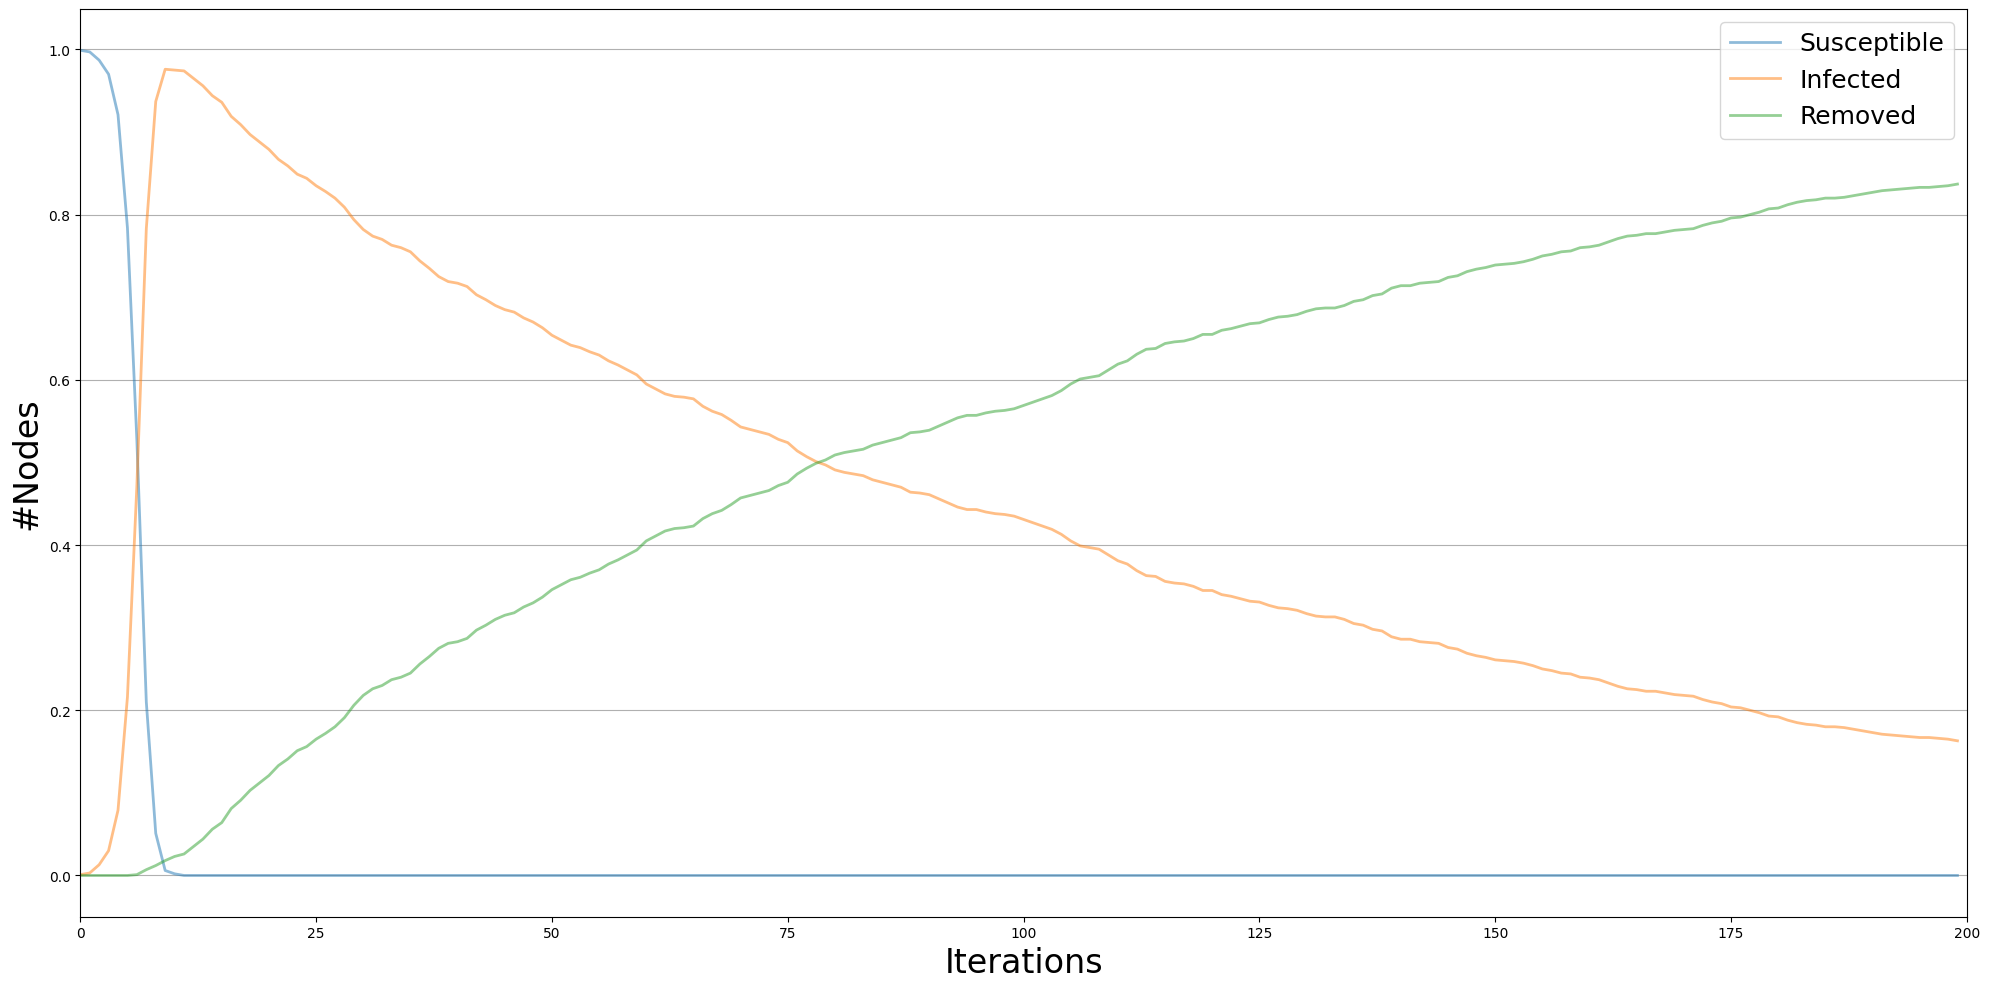

In [126]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [ ]:
import os
print(os.cpu_count())  # Prints the number of CPU cores


In [ ]:
from concurrent.futures import ThreadPoolExecutor

def process_graph(g_path, g_name, result_path):
    print(g_name)
    Sir_of_graph(g_path, num_b=6, result_path=result_path)

# Define the number of threads (adjust based on task type)
num_threads = min(32, os.cpu_count() + 4)

# Create a thread pool
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    # Submit the tasks to the thread pool
    for (g_path, g_name) in graph_list:
        executor.submit(process_graph, g_path, g_name, result_path)


In [ ]:
import threading

# Define a function to process each graph
def process_graph(g_path, g_name, result_path):
    print(g_name)
    Sir_of_graph(g_path, num_b=6, result_path=result_path)

# List to keep track of threads
threads = []

# Loop through your graph_list
for (g_path, g_name) in graph_list:
    # Create a new thread for each graph
    thread = threading.Thread(target=process_graph, args=(g_path, g_name, result_path))
    
    # Start the thread
    thread.start()
    
    # Add the thread to the list
    threads.append(thread)

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All threads have finished processing.")
